In [1]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [2]:
import pandas as pd

df= pd.read_csv("data/gold_price_data-Copy1.csv")
df

,Date,Value
0,1970-01-01,35.20
1,1970-04-01,35.10
2,1970-07-01,35.40
3,1970-10-01,36.20
4,1971-01-01,37.40
...,...,...
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70


In [3]:
df = df[['Date', 'Value']]
df

,Date,Value
0,1970-01-01,35.20
1,1970-04-01,35.10
2,1970-07-01,35.40
3,1970-10-01,36.20
4,1971-01-01,37.40
...,...,...
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70


In [4]:
df.describe()

,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [5]:
df['Date']

0        1970-01-01
1        1970-04-01
2        1970-07-01
3        1970-10-01
4        1971-01-01
            ...    
10782    2020-03-09
10783    2020-03-10
10784    2020-03-11
10785    2020-03-12
10786    2020-03-13
Name: Date, Length: 10787, dtype: object

In [6]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [7]:
df

,Date,Value
0,1970-01-01,35.20
1,1970-04-01,35.10
2,1970-07-01,35.40
3,1970-10-01,36.20
4,1971-01-01,37.40
...,...,...
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70


In [8]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0       1970-01-01
1       1970-04-01
2       1970-07-01
3       1970-10-01
4       1971-01-01
           ...    
10782   2020-03-09
10783   2020-03-10
10784   2020-03-11
10785   2020-03-12
10786   2020-03-13
Name: Date, Length: 10787, dtype: datetime64[ns]

In [9]:
df.index = df.pop('Date')
df

,Value
Date,
1970-01-01,35.20
1970-04-01,35.10
1970-07-01,35.40
1970-10-01,36.20
1971-01-01,37.40
...,...
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75


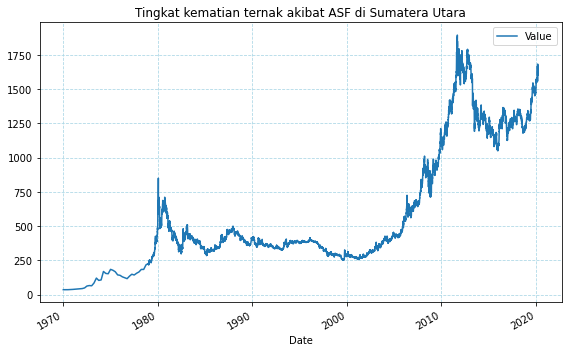

In [10]:
import matplotlib.pyplot as plt
#Visualisasi data
df.plot(figsize=(8,5),title="Tingkat kematian ternak akibat ASF di Sumatera Utara")
plt.grid(color = "lightblue", linestyle = "--")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
#df1 = df[['jumlah']] 
#df1

In [12]:
#Mengubah data harian menjadi data mingguan
df.index = pd.to_datetime(df.index)
df = df.resample('1D').mean()
df

,Value
Date,
1970-01-01,35.20
1970-01-02,NaN
1970-01-03,NaN
1970-01-04,NaN
1970-01-05,NaN
...,...
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75


In [13]:
df.isna().sum()

Value    7548
dtype: int64

<AxesSubplot:xlabel='Date'>

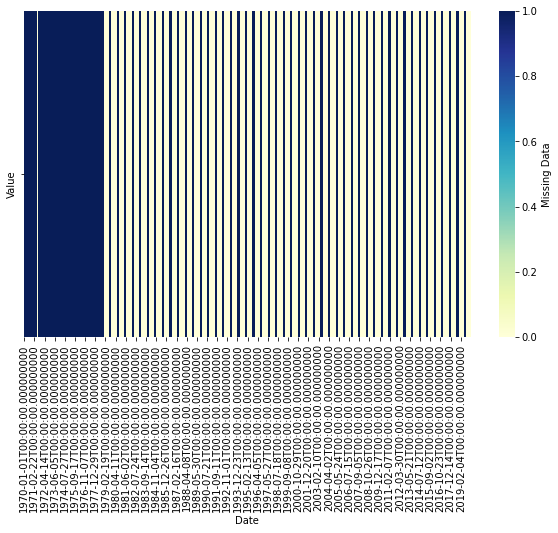

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [15]:
df=df.interpolate();

In [16]:
df.isna().sum()

Value    0
dtype: int64

<AxesSubplot:xlabel='Date'>

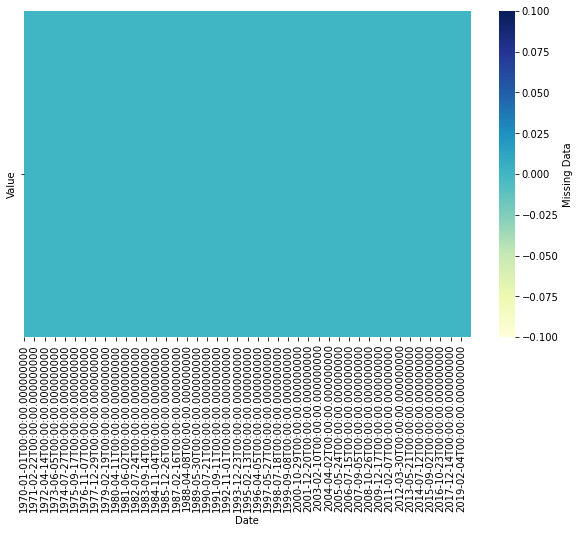

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

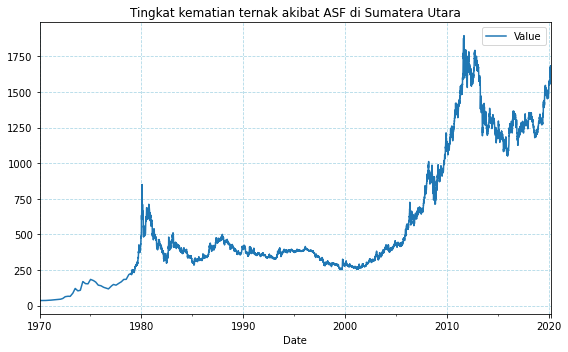

In [18]:
import matplotlib.pyplot as plt
#Visualisasi data
df.plot(figsize=(8,5),title="Tingkat kematian ternak akibat ASF di Sumatera Utara")
plt.grid(color = "lightblue", linestyle = "--")
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['Value']] = scaler.fit_transform(df[['Value']])

In [20]:
df

,Value
Date,
1970-01-01,0.000054
1970-01-02,0.000053
1970-01-03,0.000053
1970-01-04,0.000052
1970-01-05,0.000051
...,...
2020-03-09,0.880370
2020-03-10,0.871337
2020-03-11,0.870289


In [21]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=1):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Value'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

In [22]:
# Start day second time around: '2019-09-22'
windowed_df = df_to_windowed_df(df, 
                                '1970-01-02', 
                                '2020-03-13', 
                                n=1)
windowed_df

,Target Date,Target-1,Target
0,1970-01-02,0.000054,0.000053
1,1970-01-03,0.000053,0.000053
2,1970-01-04,0.000053,0.000052
3,1970-01-05,0.000052,0.000051
4,1970-01-06,0.000051,0.000051
...,...,...,...
18329,2020-03-09,0.882368,0.880370
18330,2020-03-10,0.880370,0.871337
18331,2020-03-11,0.871337,0.870289
18332,2020-03-12,0.870289,0.825636


In [23]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

In [24]:
dates, X, y = windowed_df_to_date_X_y(windowed_df)
#dates, X1, y1 = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((18334,), (18334, 1, 1), (18334,))

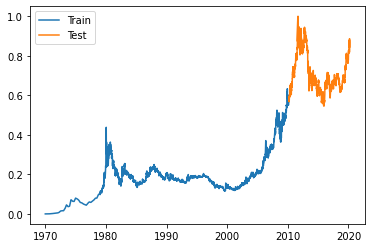

In [25]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_test, X_test, y_test = dates[q_80:], X[q_80:], y[q_80:]
#dates_train1, X_train1, y_train1 = dates[:q_80], X1[:q_80], y1[:q_80]
#dates_test1, X_test1, y_test1 = dates[q_80:], X1[q_80:], y1[q_80:]

plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Test'])

In [26]:
### Membuat model Stacked LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers

#Definisi parameter
jumlah_input = 1
epochs = 2 
batch = 64
learning_rate = 0.001
neuron = 30

model=Sequential()
model.add(LSTM(neuron,return_sequences=True,input_shape=(jumlah_input,1)))
model.add(LSTM(neuron,return_sequences=True))
model.add(LSTM(neuron))
model.add(Dense(1))
keras.optimizers.Adam(learning_rate)
model.compile(loss='mean_squared_error',optimizer='Adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 30)             3840      
                                                                 
 lstm_1 (LSTM)               (None, 1, 30)             7320      
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 18,511
Trainable params: 18,511
Non-trainable params: 0
_________________________________________________________________


In [28]:
#pemodelan 
model.fit(X_train, y_train,epochs=epochs,batch_size=batch,verbose=1)

Epoch 1/2
230/230 [==============================] - 10s 9ms/step - loss: 0.0078
Epoch 2/2
230/230 [==============================] - 2s 11ms/step - loss: 7.7595e-05


RMSE data latih: 0.0053
Korelasi Pearsons data latih: 0.999


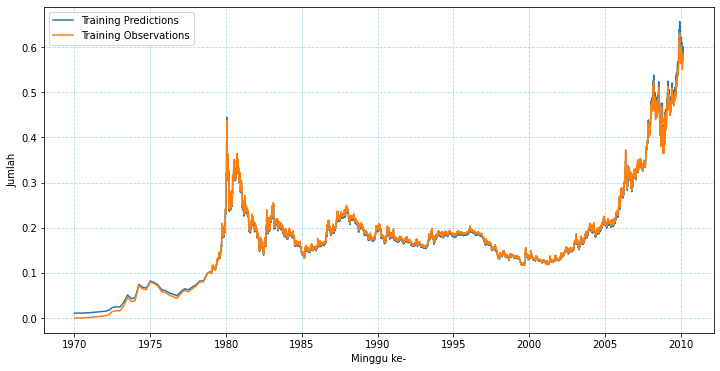

In [29]:
train_predictions = model.predict(X_train).flatten()
plt.rcParams["figure.figsize"] = (12,6)
plt.grid(color = "lightblue", linestyle = "--")
plt.ylabel("Jumlah")
plt.xlabel("Minggu ke-")
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

import math
from sklearn.metrics import mean_squared_error
#rmse_test = math.sqrt(mean_squared_error(y_train1,train_predictions))
#rmse_test

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((train_predictions - y_train) ** 2)))
print('RMSE data latih: %.4f' % rmse)

from scipy.stats import pearsonr
# Menghitung korelasi pearson data latih
corr, _ = pearsonr(y_train,train_predictions)
print('Korelasi Pearsons data latih: %.3f' % corr)

In [30]:
train_predictions

array([0.01074331, 0.01074279, 0.01074227, ..., 0.59198886, 0.58696944,
       0.59508973], dtype=float32)

RMSE data uji: 0.0321
Korelasi Pearsons data uji: 0.998


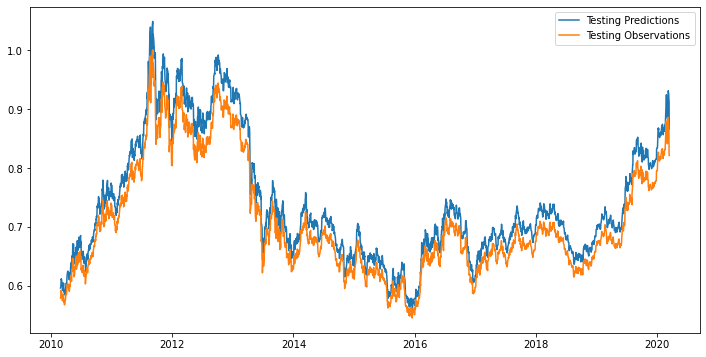

In [31]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((test_predictions - y_test) ** 2)))
print('RMSE data uji: %.4f' % rmse)

from scipy.stats import pearsonr
# Menghitung korelasi pearson data latih
corr, _ = pearsonr(y_test,test_predictions)
print('Korelasi Pearsons data uji: %.3f' % corr)

In [32]:
train_predictions=train_predictions.reshape(-1, 1)
test_predictions=test_predictions.reshape(-1, 1)

In [33]:
train_predictions=scaler.inverse_transform(train_predictions.reshape(-1, 1))
test_predictions=scaler.inverse_transform(test_predictions)
y_train=scaler.inverse_transform(y_train.reshape(-1, 1))
y_test=scaler.inverse_transform(y_test.reshape(-1, 1))

In [34]:
len(train_predictions)

14667

In [35]:
len(y_train)

14667

In [36]:
import math
from sklearn.metrics import mean_squared_error
#rmse_test = math.sqrt(mean_squared_error(y_train1,train_predictions))
#rmse_test

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((train_predictions - y_train) ** 2)))
rmse

9.879688

In [37]:
import math
from sklearn.metrics import mean_squared_error
rmse_test = math.sqrt(mean_squared_error(y_test,test_predictions))
rmse_test

59.6193184694829

In [38]:
from scipy.stats import pearsonr
# Menghitung korelasi pearson data latih
corr, _ = pearsonr(y_test.flatten(),test_predictions.flatten())
print('Korelasi Pearsons data latih: %.3f' % corr)

Korelasi Pearsons data latih: 0.998


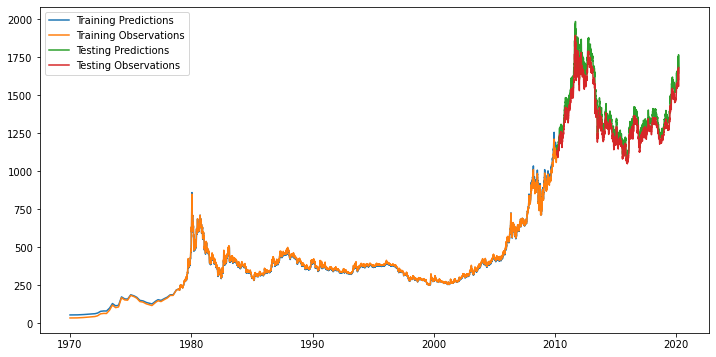

In [39]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Testing Predictions', 
            'Testing Observations'])